In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

products = pd.read_csv('./dataset/product_concat_v2.csv') 
members = pd.read_csv('./dataset/members_concat_v2.csv') 
print('상품:', products.shape)
print('회원:', members.shape)

상품: (751315, 11)
회원: (466762, 14)


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751315 entries, 0 to 751314
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MEMBER_ID     751315 non-null  object
 1   CATALOG_NM    751315 non-null  object
 2   CATEGORYM_ID  751315 non-null  int64 
 3   KEYWORD       751315 non-null  object
 4   DISPLAY       751315 non-null  int64 
 5   CATALOG_DESC  751315 non-null  object
 6   INPUT_DT      751315 non-null  int64 
 7   UPDATE_DT     751315 non-null  int64 
 8   REMOTEIP      751315 non-null  int64 
 9   SHOW_CHK      751315 non-null  int64 
 10  judge         751315 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 63.1+ MB


In [20]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466762 entries, 0 to 466761
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MEMBER_ID   466762 non-null  object
 1   GUBUN       466762 non-null  int64 
 2   COUNTRY_CD  466579 non-null  object
 3   KEYWORD     191511 non-null  object
 4   LOGIN_DT    466762 non-null  int64 
 5   LOGIN_CNT   466762 non-null  int64 
 6   INPUT_DT    466762 non-null  int64 
 7   UPDATE_DT   466762 non-null  int64 
 8   REMOTEIP    466762 non-null  int64 
 9   SHOW_CHK    466762 non-null  int64 
 10  MTYPE       466762 non-null  int64 
 11  ORDER_FLG   466762 non-null  int64 
 12  judge       466762 non-null  int64 
 13  BLACK_LIST  466762 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 49.9+ MB


## COUNTRY_CD 제외한 히트맵

히트맵은 데이터의 패턴과 구조를 시각적으로 파악하기 위한 강력한 도구로 사용됩니다. 

- 패턴 시각화: 히트맵은 데이터의 패턴을 한눈에 파악할 수 있게 해줍니다. 
    - 특히, 행과 열에 대한 상관 관계를 쉽게 파악할 수 있어 데이터의 구조를 이해하는 데 도움이 됩니다.

- 상관 관계 시각화: 히트맵은 변수 간의 상관 관계를 시각적으로 나타내기에 효과적입니다. 
    - 각 셀의 색상이나 표시된 숫자는 변수 간의 관계의 강도를 보여줄 수 있습니다.

- 이상치 탐지: 데이터에서 이상치를 쉽게 식별할 수 있도록 도와줍니다. 
    - 이상치는 히트맵에서 다른 패턴을 보이는 특이한 값으로 나타날 수 있습니다.

- 클러스터링: 히트맵은 데이터의 클러스터링 패턴을 시각적으로 나타낼 수 있습니다. 
    - 유사한 패턴을 가진 행이나 열이 서로 가깝게 위치하면 클러스터를 식별할 수 있습니다.

- 트렌드 및 패턴 분석: 데이터의 트렌드나 주기적인 패턴을 쉽게 확인할 수 있습니다. 
    - 특정 행과 열의 값이 어떻게 변하는지를 색상을 통해 파악할 수 있습니다.

- 다차원 데이터 시각화: 다차원 데이터를 효과적으로 시각화하는 도구로 활용됩니다. 
    - 여러 변수 간의 관계를 동시에 확인할 수 있습니다.

- 의사 결정 지원: 히트맵은 의사 결정을 내릴 때 정보를 시각적으로 제공하여 판단력을 향상시킵니다.

- 데이터 품질 평가: 히트맵을 사용하여 데이터의 품질을 평가할 수 있습니다. 
    - 결측값(missing values)이나 데이터의 불균형한 패턴을 쉽게 식별할 수 있습니다.


In [21]:
int_features = members.drop(['MEMBER_ID','COUNTRY_CD','KEYWORD'], axis=1)

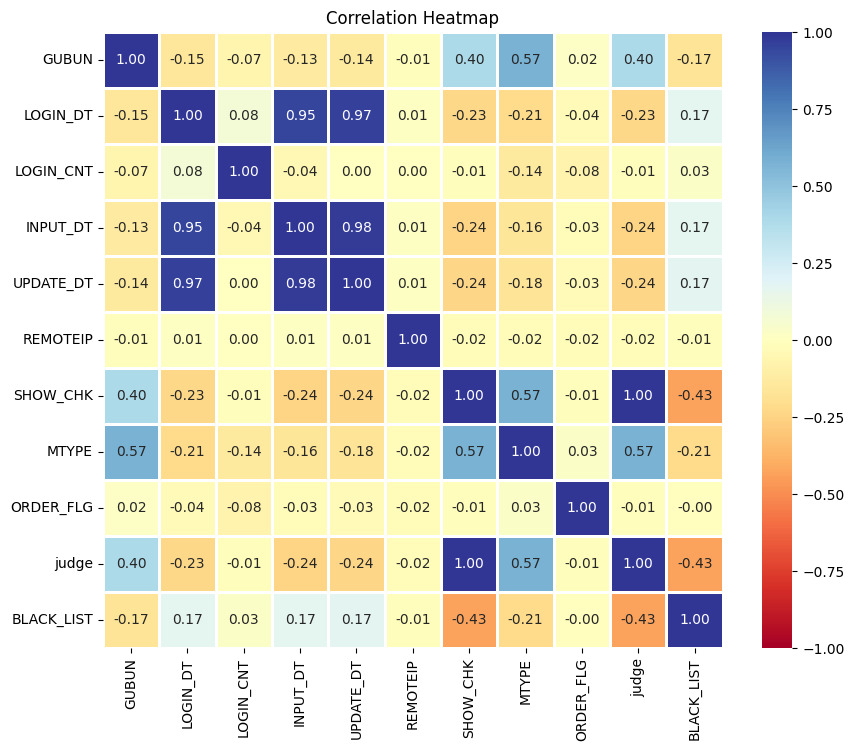

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = int_features.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 국가를 하나씩 번호 부여해서 히트맵 사용

In [23]:
import numpy as np

county_cd_labeling ={country : num for num, country in enumerate(members['COUNTRY_CD'].unique())}

print('코드명 :',county_cd_labeling.keys())
print('대체값 :',county_cd_labeling.values())

# 딕셔너리 값으로 국가 코드 변경
members['COUNTRY_CD'] = [county_cd_labeling[country] for country in members['COUNTRY_CD'].values]

코드명 : dict_keys(['US', 'CA', 'DE', 'RU', 'CN', 'SI', 'PK', 'JP', 'VN', 'GB', 'NL', 'TT', 'TH', 'CM', 'AE', 'IN', 'CO', 'HK', 'LK', 'CZ', 'AR', 'RO', 'MY', 'MX', 'KR', 'GN', 'KE', 'TZ', 'PH', 'PL', 'TG', 'ZA', 'AU', 'BR', 'TN', 'UA', 'NG', 'EG', 'MA', 'PE', 'CI', 'ES', 'KW', 'FR', 'AQ', 'TR', 'PT', 'PY', 'SE', 'HU', 'TW', 'CG', 'GE', 'LV', 'GH', 'EC', 'CL', 'LU', 'UZ', 'PG', 'SG', 'SL', 'CH', 'GI', 'GR', 'QA', 'OM', 'ID', 'DK', 'SN', 'MN', 'LI', 'BJ', 'IS', 'IR', 'FI', 'SY', 'BE', 'HN', 'IT', 'IO', 'KH', 'GY', 'PZ', 'SA', 'JM', 'EE', 'AT', 'PR', 'AF', 'ML', 'NZ', 'BD', 'MC', 'UY', 'SK', nan, 'CY', 'KZ', 'ZM', 'MO', 'LR', 'UG', 'VA', 'YM', 'IE', 'VE', 'IQ', 'LT', 'MU', 'NP', 'ZW', 'IL', 'SZ', 'AL', 'AS', 'BG', 'SD', 'ET', 'MD', 'BH', 'NO', 'BZ', 'JO', 'CS', 'RW', 'CR', 'GA', 'SB', 'KG', 'BA', 'BY', 'HR', 'AM', 'LA', 'TM', 'MT', 'RE', 'SC', 'BT', 'AZ', 'ZR', 'BN', 'DZ', 'BO', 'MI', 'BW', 'HT', 'BF', 'AO', 'SV', 'GS', 'TC', 'WF', 'WK', 'VI', 'UM', 'MV', 'KY', 'YE', 'LB', 'TO', 'PA', 'DO', 

In [24]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466762 entries, 0 to 466761
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MEMBER_ID   466762 non-null  object
 1   GUBUN       466762 non-null  int64 
 2   COUNTRY_CD  466762 non-null  int64 
 3   KEYWORD     191511 non-null  object
 4   LOGIN_DT    466762 non-null  int64 
 5   LOGIN_CNT   466762 non-null  int64 
 6   INPUT_DT    466762 non-null  int64 
 7   UPDATE_DT   466762 non-null  int64 
 8   REMOTEIP    466762 non-null  int64 
 9   SHOW_CHK    466762 non-null  int64 
 10  MTYPE       466762 non-null  int64 
 11  ORDER_FLG   466762 non-null  int64 
 12  judge       466762 non-null  int64 
 13  BLACK_LIST  466762 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 49.9+ MB


# 회원

In [25]:
int_features = members.drop(['MEMBER_ID','KEYWORD'], axis=1)

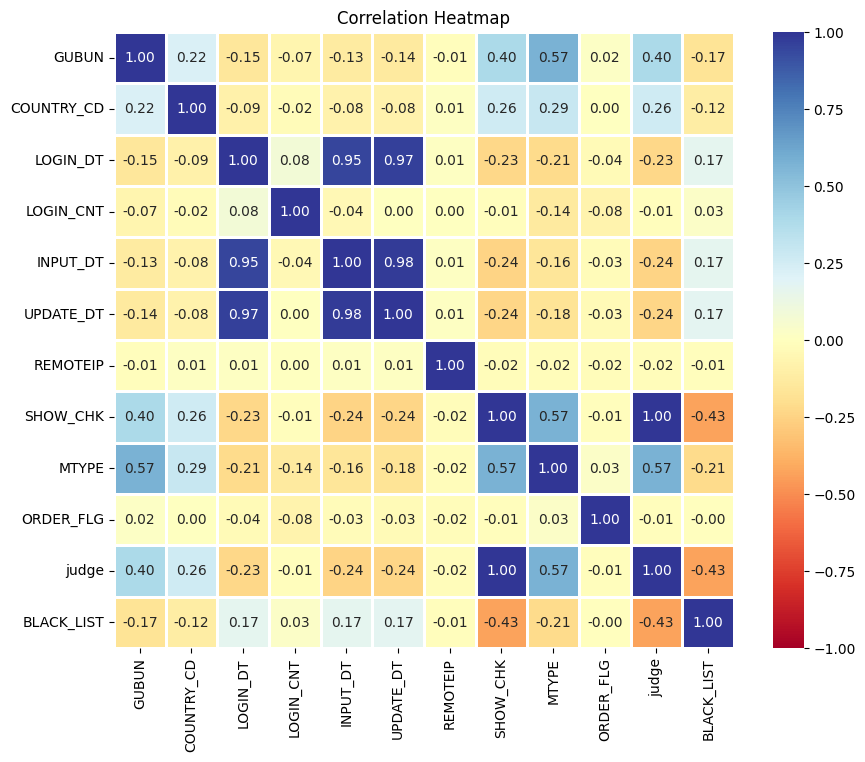

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = int_features.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 상품

In [27]:
item_int_features = products.drop(['MEMBER_ID', 'CATALOG_NM', 'CATALOG_DESC','judge','KEYWORD'],axis= 1)
item_int_features.head(3)

,CATEGORYM_ID,DISPLAY,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK
0,212815,1,20230228,20230228,21978227175,1
1,212815,1,20230228,20230228,4237992,1
2,212815,1,20230228,20230228,4237992,1


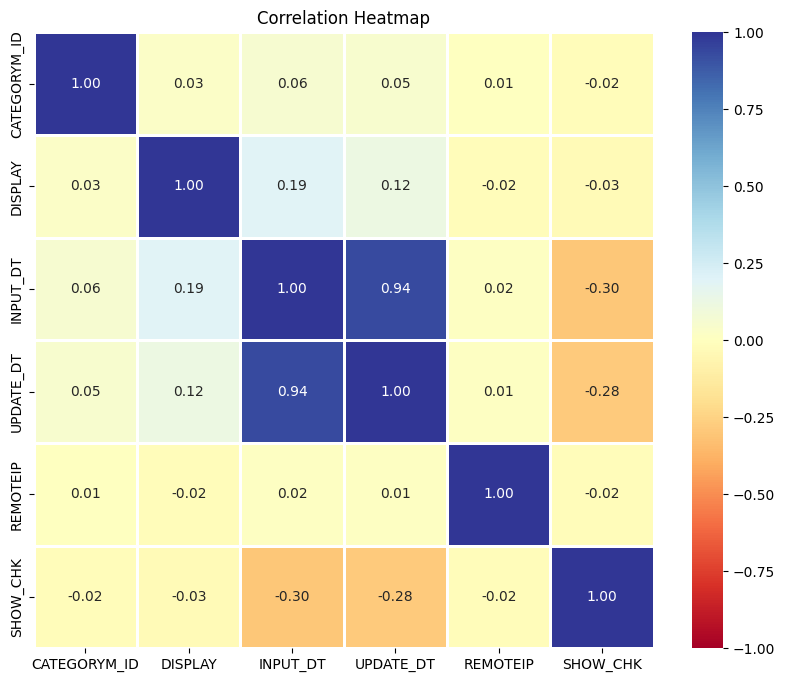

In [28]:
correlation_matrix = item_int_features.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 상품

## 비슷한 고윳값 찾아보기 (표준화 x)

In [29]:
item_int_features.describe()

,CATEGORYM_ID,DISPLAY,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK
count,7.513150e+05,751315.000000,7.513150e+05,7.513150e+05,7.513150e+05,751315.000000
mean,9.426359e+05,0.877955,2.020144e+07,2.020311e+07,3.040833e+10,2.248641
std,4.381414e+06,0.327338,1.523710e+04,1.529272e+04,5.498302e+10,1.246831
min,1.000000e+00,0.000000,2.018010e+07,2.018010e+07,1.525900e+04,0.000000
25%,2.053000e+03,1.000000,2.019022e+07,2.019052e+07,1.203621e+09,1.000000
50%,5.350400e+04,1.000000,2.020072e+07,2.020092e+07,1.051127e+10,3.000000
75%,2.959020e+05,1.000000,2.021113e+07,2.022013e+07,1.972107e+10,3.000000
max,4.004110e+07,1.000000,2.023023e+07,2.023023e+07,2.232452e+11,3.000000


In [30]:
from sklearn.decomposition import PCA
import numpy as np

# PCA 모델 생성
pca = PCA(n_components=3)  # 원하는 주성분의 개수 설정
pca.fit(item_int_features)

# 주성분과 고윳값 확인
principal_components = pca.components_
explained_variance = pca.explained_variance_

# 비슷한 크기의 고윳값을 갖는 주성분 활용
similar_eigenvalues_indices = np.where(np.isclose(explained_variance, explained_variance[0], rtol=1e-3))

# 해당 주성분을 이용하여 피처화
new_features = item_int_features.dot(principal_components[similar_eigenvalues_indices].T)

# 결과 확인
print("Original Data Shape:", item_int_features.shape)
print("New Features Shape:", new_features.shape)

Original Data Shape: (751315, 6)
New Features Shape: (751315, 1)


- 주성분과 고윳값은 principal_components 및 explained_variance에 저장되어 있습니다. 
- 특정한 기준(여기서는 상대적인 차이 값인 rtol을 이용)을 사용하여 비슷한 크기의 고윳값을 찾고, 해당 주성분을 이용하여 새로운 피처를 생성합니다.

In [31]:
principal_components

array([[ 6.01579439e-07, -1.14797061e-13,  4.20672005e-09,
         3.77032473e-09,  1.00000000e+00, -3.62192582e-13],
       [ 9.99999963e-01,  2.16877741e-09,  2.03557698e-04,
         1.78359092e-04, -6.01580946e-07, -6.27803849e-09],
       [ 2.70016517e-04, -2.40596236e-06, -7.05565479e-01,
        -7.08644680e-01,  5.47750063e-09,  1.74335601e-05]])

In [32]:
explained_variance

array([3.02313282e+21, 1.91956985e+13, 4.49650349e+08])

In [33]:
import numpy as np

# 고윳값 분해
covariance_matrix = np.cov(item_int_features, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 고윳값 정렬
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 비슷한 크기의 고윳값을 갖는 주성분 선택
threshold = 0.1  # 임의의 임계값 설정
similar_eigenvalues_indices = np.where(np.abs(np.diff(sorted_eigenvalues)) < threshold)[0]

# 선택된 고윳값과 해당하는 고유벡터들
selected_eigenvalues = sorted_eigenvalues[similar_eigenvalues_indices]
selected_eigenvectors = sorted_eigenvectors[:, similar_eigenvalues_indices]

# 결과 확인
print("Selected Eigenvalues:", selected_eigenvalues)
print("Selected Eigenvectors:", selected_eigenvectors)

Selected Eigenvalues: []
Selected Eigenvectors: []


In [34]:
print(pca.explained_variance_ratio_)
print(f'분산 합계 = {np.sum(pca.explained_variance_ratio_):.2f}%')

[9.99999994e-01 6.34960472e-09 1.48736550e-13]
분산 합계 = 1.00%


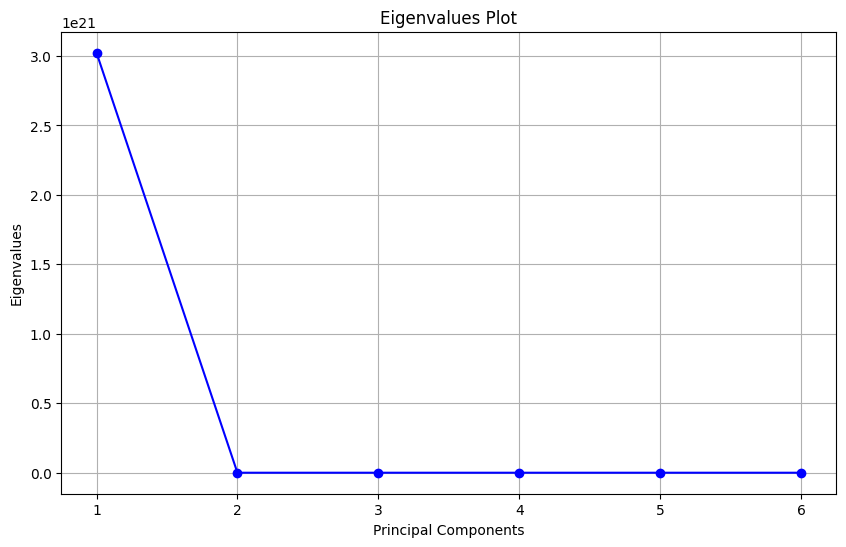

In [35]:
# 고윳값 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Eigenvalues Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

## 비슷한 고윳값 찾아보기 (표준화 o)

In [36]:
from sklearn.preprocessing import StandardScaler

scaled_x = StandardScaler().fit_transform(item_int_features)

In [37]:
# PCA 모델 생성
pca = PCA(n_components=3)  # 원하는 주성분의 개수 설정
pca.fit(scaled_x)

# 주성분과 고윳값 확인
principal_components = pca.components_
explained_variance = pca.explained_variance_

# 비슷한 크기의 고윳값을 갖는 주성분 활용
similar_eigenvalues_indices = np.where(np.isclose(explained_variance, explained_variance[0], rtol=1e-3))

# 해당 주성분을 이용하여 피처화
new_features = scaled_x.dot(principal_components[similar_eigenvalues_indices].T)

# 결과 확인
print("Original Data Shape:", scaled_x.shape)
print("New Features Shape:", new_features.shape)

Original Data Shape: (751315, 6)
New Features Shape: (751315, 1)


In [38]:
principal_components

array([[ 0.074029  ,  0.18766044,  0.6540141 ,  0.64449305,  0.01843435,
        -0.34037877],
       [-0.15816416, -0.52793636,  0.0024797 ,  0.03755817,  0.80776289,
        -0.20583888],
       [ 0.9124534 ,  0.19032598, -0.04470438, -0.06473426,  0.33501316,
         0.11305742]])

In [39]:
explained_variance

array([2.1408949 , 1.01590656, 0.99954375])

In [40]:
# 고윳값 분해
covariance_matrix = np.cov(scaled_x, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 고윳값 정렬
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 비슷한 크기의 고윳값을 갖는 주성분 선택
threshold = 0.1  # 임의의 임계값 설정
similar_eigenvalues_indices = np.where(np.abs(np.diff(sorted_eigenvalues)) < threshold)[0]

# 선택된 고윳값과 해당하는 고유벡터들
selected_eigenvalues = sorted_eigenvalues[similar_eigenvalues_indices]
selected_eigenvectors = sorted_eigenvectors[:, similar_eigenvalues_indices]

# 결과 확인
print("Selected Eigenvalues:", selected_eigenvalues)
print("Selected Eigenvectors:", selected_eigenvectors)

Selected Eigenvalues: [1.01590656 0.99954375]
Selected Eigenvectors: [[ 0.15816416 -0.9124534 ]
 [ 0.52793636 -0.19032598]
 [-0.0024797   0.04470438]
 [-0.03755817  0.06473426]
 [-0.80776289 -0.33501316]
 [ 0.20583888 -0.11305742]]


In [41]:
print(pca.explained_variance_ratio_)
print(f'분산 합계 = {np.sum(pca.explained_variance_ratio_):.2f}%')

[0.35681534 0.16931753 0.1665904 ]
분산 합계 = 0.69%


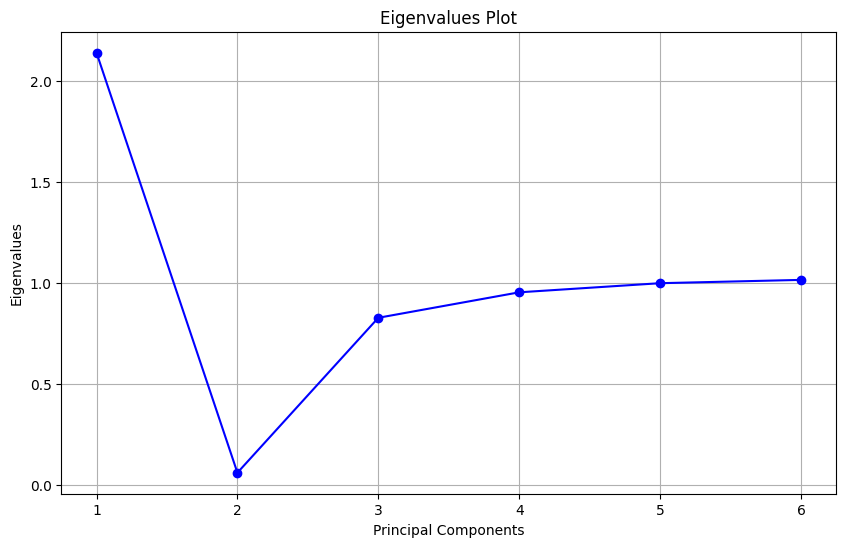

In [42]:
# 고윳값 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Eigenvalues Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

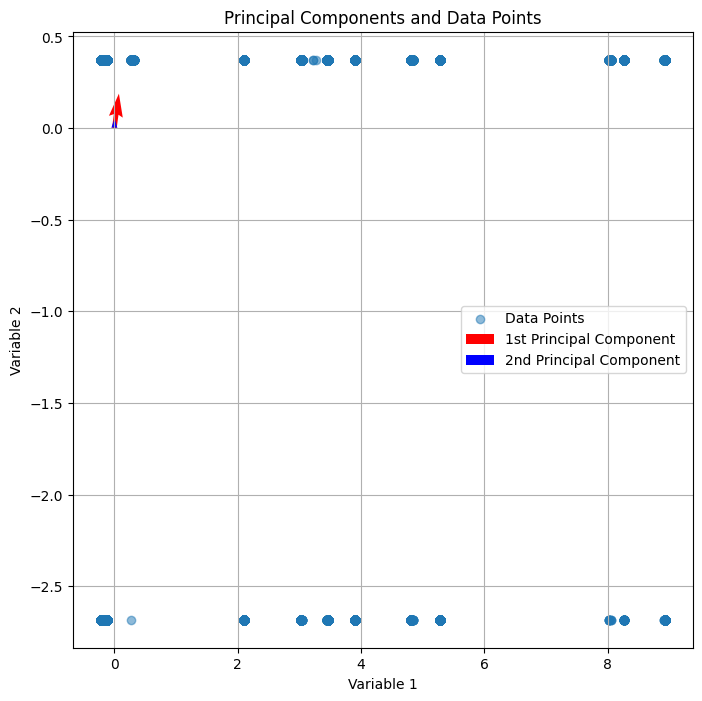

In [43]:
# 그래프 그리기
plt.figure(figsize=(8, 8))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], alpha=0.5, label='Data Points')

# 첫 번째 주성분 방향
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='1st Principal Component')

# 두 번째 주성분 방향
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='2nd Principal Component')

plt.title('Principal Components and Data Points')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()
plt.grid(True)
plt.show()

# VIF

In [29]:
# pip install statsmodels

## 회원 vif

- int_features.columns: DataFrame인 int_features의 열(변수) 이름들을 가져와서 vif DataFrame의 "Variable" 열에 할당합니다. 
    - 이 부분은 각 계수가 어떤 독립 변수를 나타내는지를 나타냅니다.

- variance_inflation_factor(int_features.values, i): statsmodels 라이브러리의 variance_inflation_factor 함수를 사용하여 VIF를 계산합니다. 
    - int_features.values는 int_features DataFrame의 값들을 NumPy 배열로 가져오며, i는 각 독립 변수의 인덱스를 나타냅니다.
[...] for i in range(int_features.shape[1])]: 리스트 컴프리헨션을 사용하여 각 독립 변수에 대한 VIF 값을 계산하고 리스트로 저장합니다. 이 부분은 int_features DataFrame의 열 수만큼 반복됩니다.

In [44]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = int_features.columns
vif["VIF"] = [variance_inflation_factor(int_features.values, i) for i in range(int_features.shape[1])]

# VIF를 소수로 만들기
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

print(vif)

      Variable                 VIF
0        GUBUN                1.51
1   COUNTRY_CD                1.11
2     LOGIN_DT               17.58
3    LOGIN_CNT                1.17
4     INPUT_DT               31.22
5    UPDATE_DT               46.72
6     REMOTEIP                1.00
7     SHOW_CHK  529835250278881.88
8        MTYPE                2.04
9    ORDER_FLG                1.00
10       judge  529835250278881.88
11  BLACK_LIST                1.24


## 상품 vif

In [45]:
# VIF 계산
vif = pd.DataFrame()
vif["Variable"] = item_int_features.columns
vif["VIF"] = [variance_inflation_factor(item_int_features.values, i) for i in range(item_int_features.shape[1])]

# VIF를 소수로 만들기
vif["VIF"] = ["{:.2f}".format(value) for value in vif["VIF"]]

print(vif)

       Variable   VIF
0  CATEGORYM_ID  1.00
1       DISPLAY  1.04
2      INPUT_DT  8.12
3     UPDATE_DT  8.18
4      REMOTEIP  1.00
5      SHOW_CHK  1.00
